In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from numpy import genfromtxt


import pandas as pd

from mpl_toolkits import mplot3d
#%matplotlib notebook

import math

#import cv2
import pims
from PIL import Image

import skimage

import json

#own modules / functions
import sys

pythonPackagePath = "/Users/johannesschoeneberg/git/pyLattice/src/python/"
sys.path.append(pythonPackagePath+"/modules")
import TiffProcessing as tiffproc
import InputProcessing as inproc
sys.path.append(pythonPackagePath+"/classes")
import Track

# input data

In [2]:
inputParameters = pd.read_csv(pythonPackagePath+'../../input/big_data/_inputParameters.csv',names=['key','value'])


inputDataFolder = inproc.getInputParameter(inputParameters,"inputDataFolder")
outputDataFolder = inproc.getInputParameter(inputParameters,"outputDataFolder")

trackingCsvFilename = inproc.getInputParameter(inputParameters,"trackingCsvFilename")
trackingCsvFilenameProcessed = inproc.getInputParameter(inputParameters,"trackingCsvFilenameProcessed")

slave_outputDataFolder  = inproc.getInputParameter(inputParameters,"slave_outputDataFolder")
master_outputDataFolder  = inproc.getInputParameter(inputParameters,"master_outputDataFolder")

slave_uniqueFilenameString = inproc.getInputParameter(inputParameters,"slave_uniqueFilenameString")
master_uniqueFilenameString = inproc.getInputParameter(inputParameters,"master_uniqueFilenameString")


slave_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"slave_trackingProcessedBildFilename")
master_trackingProcessedBildFilename = inproc.getInputParameter(inputParameters,"master_trackingProcessedBildFilename")



framerate_msec = float(inproc.getInputParameter(inputParameters,"framerate_msec"))
movieLength = int(inproc.getInputParameter(inputParameters,"movieLength"))


print(framerate_msec)


5689.0


In [3]:
slave_filesOfInterest = inproc.getFilenamesOfInputTiffFiles(inputDataFolder,slave_uniqueFilenameString)
master_filesOfInterest = inproc.getFilenamesOfInputTiffFiles(inputDataFolder,master_uniqueFilenameString)

--- folder searched in: /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon
--- example of files found: S3P5_488_150mw_560_300mw_Objdz150nm_ch0_CAM1_stack0000_488nm_0000000msec_0090116101msecAbs_000x_000y_003z_0000t_decon.tif
--- number of files found: 70
--- folder searched in: /Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon
--- example of files found: S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0000_560nm_0000000msec_0090116101msecAbs_000x_000y_003z_0000t_decon.tif
--- number of files found: 70


/Users/johannesschoeneberg/Desktop/PostDoc/drubin_lab/organoids_lattice_data/data_/2016_04_25Daphne/Sample3_CD_10ulMG/Position5_Basal_apical_ObjScan/matlab_decon/S3P5_488_150mw_560_300mw_Objdz150nm_ch1_CAM1_stack0000_560nm_0000000msec_0090116101msecAbs_000x_000y_003z_0000t_decon.tif
(201, 704, 600)


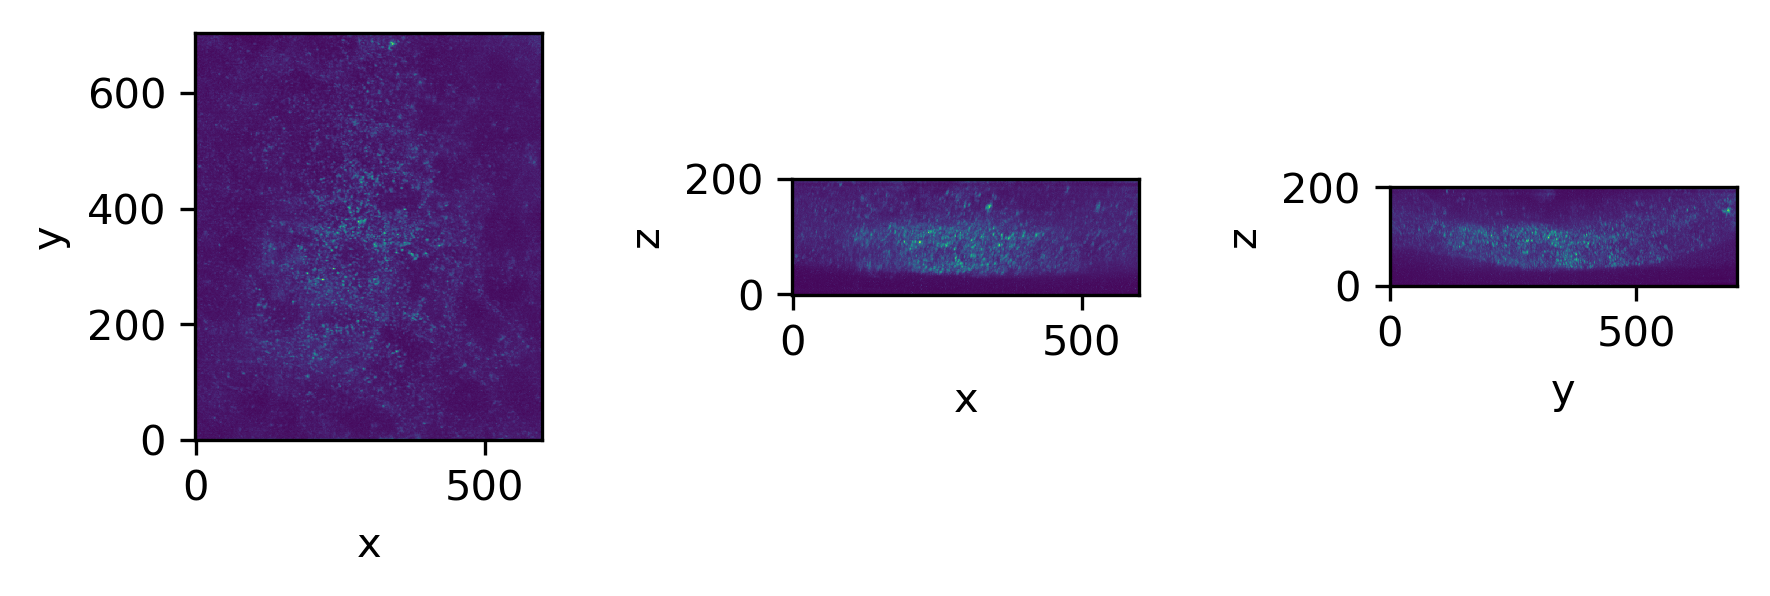

In [4]:
# read the image from where the detections come from
frameId = 0

path = inputDataFolder+'/'+master_filesOfInterest[frameId]
print(path)
latticeMovieFrame = skimage.external.tifffile.imread(path)
latticeMovieFrame_shape = latticeMovieFrame.shape
print(latticeMovieFrame_shape)

tiffproc.maxIntensityProjection(latticeMovieFrame)

In [5]:
# read the raw csv data for further processing

path = outputDataFolder+'/'+trackingCsvFilenameProcessed
print(path)
print(path)

data = pd.read_csv(path,header=0)
data.columns = ["trackId","tracklength","time[s]","frameId","lifetime","catIdx","m_x",'m_y',"m_z","m_A","m_c","m_pval_Ar","s_x",'s_y',"s_z","s_A","s_c","s_pval_Ar"]
trackIds = data.drop_duplicates(subset='trackId')['trackId'].values

data[0:5]





/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/trackedFeaturesProcessed.csv
/Users/johannesschoeneberg/git/pyLattice/input/big_data/output/trackedFeaturesProcessed.csv


,trackId,tracklength,time[s],frameId,lifetime,catIdx,m_x,m_y,m_z,m_A,m_c,m_pval_Ar,s_x,s_y,s_z,s_A,s_c,s_pval_Ar
0,1,70,0,1,398.23,4,2.470622e+02,3.589416e+02,1.549039e+02,2.852619e+04,8.000496e+03,0,2.467932e+02,3.583062e+02,1.549039e+02,2.463543e+04,2.298148e+04,4.004483e-248
1,1,70,5.689000e+00,2,398.23,4,2.456148e+02,3.597828e+02,1.550418e+02,2.568300e+04,7.529965e+03,0,2.478346e+02,3.586792e+02,1.550418e+02,3.039361e+04,2.187127e+04,9.081350e-301
2,1,70,1.137800e+01,3,398.23,4,2.461329e+02,3.596650e+02,1.552289e+02,2.243185e+04,7.161439e+03,0,2.481213e+02,3.588762e+02,1.552289e+02,2.262764e+04,2.301794e+04,2.082318e-241
3,1,70,1.706700e+01,4,398.23,4,2.464530e+02,3.601393e+02,1.541899e+02,2.305632e+04,7.131548e+03,0,2.480255e+02,3.576223e+02,1.541899e+02,1.986063e+04,2.412181e+04,6.424817e-223
4,1,70,2.275600e+01,5,398.23,4,2.450720e+02,3.601834e+02,1.542996e+02,2.097679e+04,6.756136e+03,0,2.437382e+02,3.597427e+02,1.542996e+02,1.916658e+04,2.210576e+04,2.288247e-261


# select subset

In [6]:
# select a subset of the tracks, e.g. for displaying only long tracks

allTrackIdsLrgrThanFour = (data[data['tracklength'] >= 4]).drop_duplicates(subset='trackId')['trackId'].values
allTrackIds = np.unique(data['trackId'].values)
cat_Ia_Tracks = np.unique(data[data['catIdx'] == 1]['trackId'])
cat_Ia_Tracks_long = np.unique(data[((data['catIdx'] == 1) & (data['tracklength'] > 4))]['trackId'])
cat_Ib_Tracks = np.unique(data[data['catIdx'] == 2]['trackId'])
cat_Ic_Tracks = np.unique(data[data['catIdx'] == 3]['trackId'])
cat_Id_Tracks = np.unique(data[data['catIdx'] == 4]['trackId'])
cat_IIa_Tracks = np.unique(data[data['catIdx'] == 5]['trackId'])
cat_IIb_Tracks = np.unique(data[data['catIdx'] == 6]['trackId'])
cat_IIc_Tracks = np.unique(data[data['catIdx'] == 7]['trackId'])
cat_IId_Tracks = np.unique(data[data['catIdx'] == 8]['trackId'])


print('len(allTrackIdsLrgrThanFour)/len(allTrackIds)')
print(str(len(allTrackIdsLrgrThanFour))+'/'+str(len(allTrackIds)))
print()
print(allTrackIdsLrgrThanFour)
print('/')
print(allTrackIds)
print()

len(allTrackIdsLrgrThanFour)/len(allTrackIds)
1471/3274

[   1    2    3 ..., 1469 1470 1471]
/
[   1    2    3 ..., 3272 3273 3274]



In [7]:
import re
def parseCutString(string):
    result = []
    #pattern match the indexing string
    chunks = re.findall("\\[[0-9]+,[0-9]+\\]",string)
    for chunk in chunks:
        indexes = re.findall("[0-9]+",chunk)
        if(len(indexes)==2):
            result.append([int(indexes[0]),int(indexes[1])])
        else:
            print("error: index \""+indexes+"\" cannot be parsed")

    return result

In [8]:
# align them all to the max

In [9]:

maxIdxs = []
for trackId in cat_Ia_Tracks_long:
    track = track = data[data['trackId'] == trackId]
    maxIdx = np.argmax(track['s_A'].values)
    maxIdxs.append(maxIdx)
maxIdxs = np.array(maxIdxs)
print(maxIdxs)

[ 0 28 19 20  3  9  9 15  7 14 14 17  1 20 12 12  2 10 19 11 12 13  1  3 15
  0 11 12  2  6  8  4  2  0  0 14 12 12 12 15  6 15  9 13  0 14  7  0 10  4
  3  2 12 11  5  6  3  0 14 12 11  2  4 13  1  8  2  9  5  1  3  2  3  3  6
  3 10  7 12  8  3  6 11 11 11  5  1  0  7  2  1  8  4  2  6  2  1 11  7 11
  1  4  5  3  6  0  4  0  3  8  4  1  6  6  0  3  4  0  8  6  5  6  0  6  0
  1  3  6  2  1  2  8  9  7  0  2  1  9  6  4  2  8  8  4  2  9  1  9  7  7
  3  6  2  1  1  4  5  4  6  3  9  0  7  2  8  2  0  7  5  2  5  2  3  2  2
  7  2  1  0  1  8  3  7  4  3  2  1  5  2  7  5  7  2  7  0  0  8  0  5  3
  8  1  6  4  7  3  7  0  7  7  0  0  8  5  7  4  5  7  5  5  1  0  1  2  3
  0  6  4  0  0  6  2  3  0  2  6  5  0  6  2  5  7  2  0  4  2  1  6  4  3
  7  0  0  6  5  6  5  4  0  1  0  4  5  3  0  5  1  1  0  1  1  1  0  0  6
  4  1  4  3  0  5  2  3  1  0  6  2  6  5  2  4  5  1  2  4  5  0  5  4  0
  2  6  2  1  1  5  5  2  3  3  0  4  5  5  5  3  6  5  4  1  3  3  3  1  3
  2  6  2  3

In [54]:
#lifetimeCohorts = [[0, 9], [9,18],[18,27],[27,50]]
lifetimeCohorts = [[0, 6], [6,12],[12,18],[18,50]]

In [55]:
# data preprocessing

# take only those tracks that belong to the cohort:

#initialize the trackId array sorted by lifetime cohort
trackIdsAssignedToCohorts = []
for i in range(0,len(lifetimeCohorts)):
    trackIdsAssignedToCohorts.append(np.array([]))


trackIdsUsed = cat_Ia_Tracks_long

for trackId in trackIdsUsed:
    track = data[data['trackId'] == trackId]
    tracklength = track['tracklength'].values[0]
    m_intensity = track['m_A'].values.astype(float)
    s_intensity = track['s_A'].values.astype(float)
    maxIdx = np.argmax(s_intensity)
    # only include those tracks that do not have the dynamin peak in the first three frames
    if(maxIdx >3):
#    if(True):
    
        for i in range(0,len(lifetimeCohorts)):
        
            if((tracklength >lifetimeCohorts[i][0]) & (tracklength <lifetimeCohorts[i][1])):
                trackIdsAssignedToCohorts[i] = np.append(trackIdsAssignedToCohorts[i],trackId)
        
trackIdsAssignedToCohorts = np.array(trackIdsAssignedToCohorts)
print(trackIdsAssignedToCohorts)
for cohortIdArray in trackIdsAssignedToCohorts:
    print(len(cohortIdArray))

[ array([  937.,   941.,   943.,   946.,   947.,   953.,   954.,   959.,
         967.,   971.,   972.,   973.,   974.,   976.,   981.,   986.,
         993.,   996.,   998.,  1002.,  1003.,  1008.,  1009.,  1015.,
        1019.,  1020.,  1021.,  1032.,  1034.,  1039.,  1041.,  1046.,
        1057.,  1058.,  1059.,  1063.,  1069.,  1071.,  1078.,  1079.])
 array([ 290.,  291.,  292.,  294.,  296.,  298.,  300.,  301.,  302.,
        303.,  304.,  305.,  306.,  307.,  308.,  310.,  312.,  313.,
        316.,  317.,  318.,  319.,  320.,  321.,  344.,  351.,  352.,
        354.,  355.,  357.,  358.,  359.,  360.,  361.,  362.,  364.,
        365.,  366.,  367.,  369.,  370.,  371.,  373.,  374.,  407.,
        409.,  411.,  412.,  413.,  416.,  419.,  422.,  423.,  424.,
        425.,  426.,  427.,  429.,  430.,  431.,  432.,  434.,  436.,
        438.,  439.,  440.,  442.,  444.,  445.,  447.,  448.,  449.,
        450.,  451.,  452.,  453.,  487.,  499.,  500.,  501.,  502.,
        503

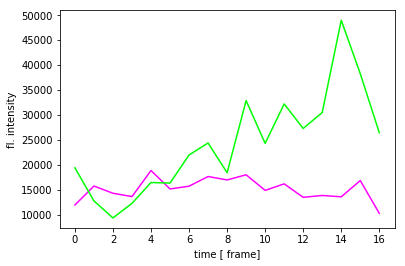

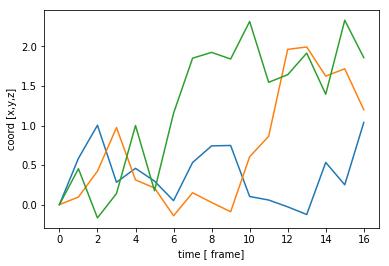

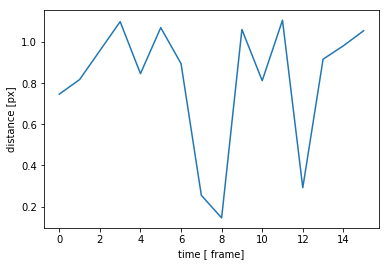

Text(0.5,0,'time [ frame]')

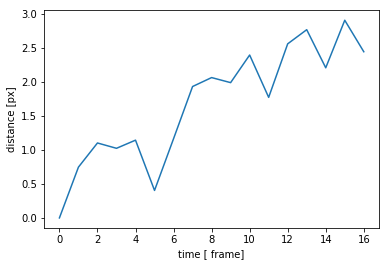

In [196]:
trackId = 123

track = data[data['trackId'] == trackId]
tracklength = track['tracklength'].values[0]
m_intensity = track['m_A'].values.astype(float)
s_intensity = track['s_A'].values.astype(float)
m_x = track['m_x'].values.astype(float)
m_y = track['m_y'].values.astype(float)
m_z = track['m_z'].values.astype(float)

plt.plot(m_intensity, c='magenta')
plt.plot(s_intensity, c='lime')
plt.ylabel('fl. intensity')
plt.xlabel('time [ frame]')
plt.show()

plt.plot(m_x-m_x[0])
plt.plot(m_y-m_y[0])
plt.plot(m_z-m_z[0])
plt.ylabel('coord [x,y,z]')
plt.xlabel('time [ frame]')
plt.show()

distances = []
for i in range(1,len(track)):
    v1 = np.array([m_x[i-1],m_y[i-1],m_z[i-1]])
    v2 = np.array([m_x[i],m_y[i],m_z[i]])
    dist = np.linalg.norm(v2-v1)
    distances.append(dist)
distances = np.array(distances)
plt.plot(distanceToStart)
plt.ylabel('distance [px]')
plt.xlabel('time [ frame]')
plt.show()

distanceToStart = []
for i in range(0,len(track)):
    v1 = np.array([m_x[0],m_y[0],m_z[0]])
    v2 = np.array([m_x[i],m_y[i],m_z[i]])
    dist = np.linalg.norm(v2-v1)
    distanceToStart.append(dist)
distanceToStart = np.array(distanceToStart)

plt.plot(distanceToStart)
plt.ylabel('distance [px]')
plt.xlabel('time [ frame]')

In [217]:
def createBufferForDistances(listOfTrackIdsAssignedToCohort,backgroundIntensity=0):


    trackIdArray = listOfTrackIdsAssignedToCohort
    
    m_buffer = []
    s_buffer = []
    
    bufferSize = 200
    bufferZero = 100
    
    m_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity)
    s_buffer = np.full(( len(trackIdArray),bufferSize), backgroundIntensity)
    
    
    #for i in range(0,bufferSize):
    #    m_buffer.append([])
    #    s_buffer.append([])
        
    counter = 0
    
    for trackId in trackIdArray:
        track = data[data['trackId'] == trackId]
        tracklength = track['tracklength'].values[0]
        m_intensity = track['m_A'].values.astype(float)
        s_intensity = track['s_A'].values.astype(float)
        
        m_x = track['m_x'].values.astype(float)
        m_y = track['m_y'].values.astype(float)
        m_z = track['m_z'].values.astype(float)       
        m_distances = []
        for i in range(1,len(track)):
            v1 = np.array([m_x[i-1],m_y[i-1],m_z[i-1]])
            v2 = np.array([m_x[i],m_y[i],m_z[i]])
            dist = np.linalg.norm(v2-v1)
            m_distances.append(dist)
        m_distances = np.array(m_distances)
        
        m_distancesToStart = []
        for i in range(0,len(track)):
            v1 = np.array([m_x[0],m_y[0],m_z[0]])
            v2 = np.array([m_x[i],m_y[i],m_z[i]])
            dist = np.linalg.norm(v2-v1)
            m_distancesToStart.append(dist)
        m_distancesToStart = np.array(m_distancesToStart)
        
        s_x = track['s_x'].values.astype(float)
        s_y = track['s_y'].values.astype(float)
        s_z = track['s_z'].values.astype(float)       
        s_distances = []
        for i in range(1,len(track)):
            v1 = np.array([s_x[i-1],s_y[i-1],s_z[i-1]])
            v2 = np.array([s_x[i],s_y[i],s_z[i]])
            dist = np.linalg.norm(v2-v1)
            s_distances.append(dist)
        s_distances = np.array(s_distances)
        
        s_distancesToStart = []
        for i in range(0,len(track)):
            v1 = np.array([s_x[0],s_y[0],s_z[0]])
            v2 = np.array([s_x[i],s_y[i],s_z[i]])
            dist = np.linalg.norm(v2-v1)
            s_distancesToStart.append(dist)
        s_distancesToStart = np.array(s_distancesToStart)
        
        maxIdx = np.argmax(s_intensity)
        
    
        for i in range(0,len(m_distances)):
            if(not np.isnan(m_intensity[i])):
                m_buffer[counter][bufferZero-maxIdx+i]=(m_distancesToStart[i])
        for i in range(0,len(s_distances)):
            if(not np.isnan(s_intensity[i])):
                s_buffer[counter][bufferZero-maxIdx+i]=(s_distancesToStart[i])
           
                
        counter = counter+1;
    
    
    return (m_buffer,s_buffer)


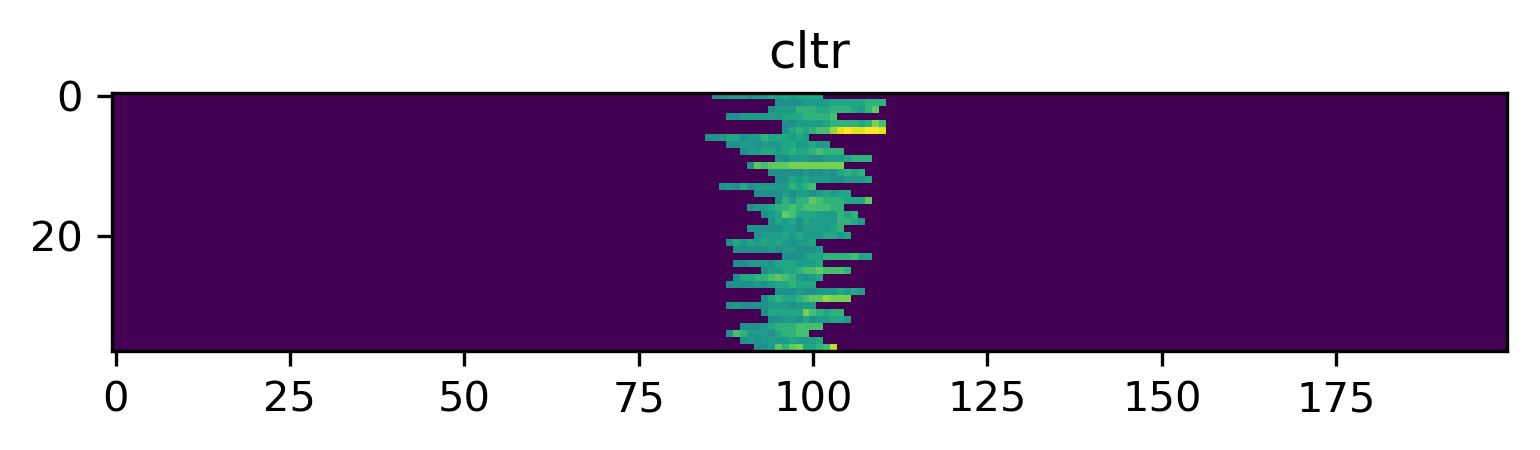

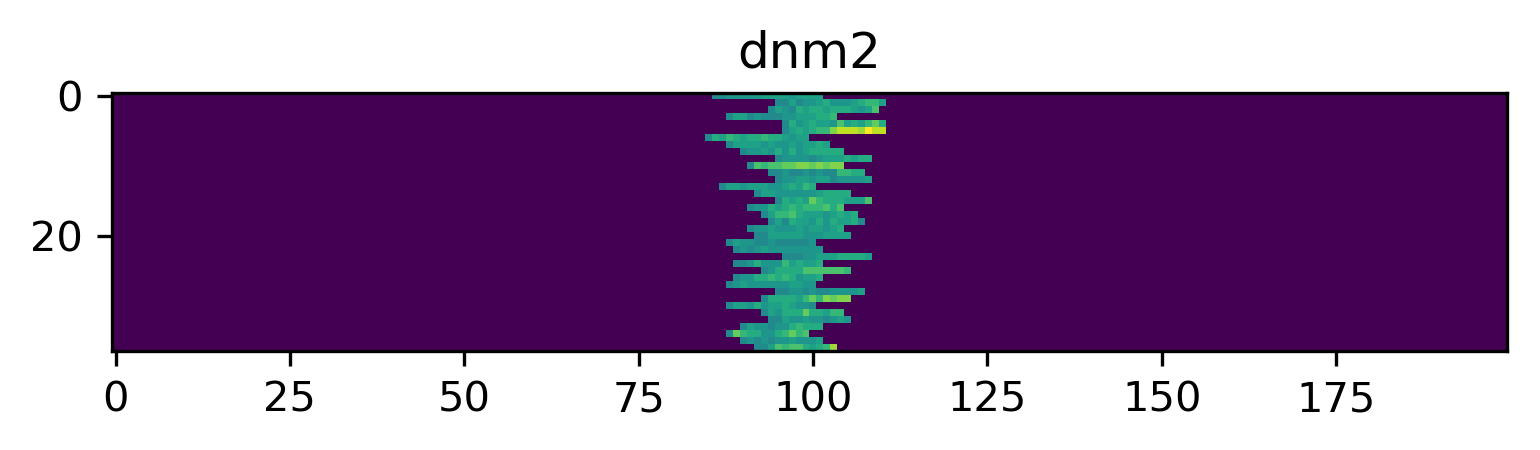

In [218]:
#calculate all the buffers for all cohorts
backgroundIntensity = 0

cohortBuffers = []
for i in range(0,len(lifetimeCohorts)):
    m_buffer, s_buffer = createBufferForDistances(trackIdsAssignedToCohorts[i], -10)
    cohortBuffers.append([m_buffer,s_buffer])

cohortIdx = 2
m_buffer,s_buffer = cohortBuffers[cohortIdx]
plt.figure(dpi=300)
plt.title('cltr')
plt.imshow(m_buffer)


plt.figure(dpi=300)
plt.title('dnm2')
plt.imshow(s_buffer)

In [219]:
def avgAllColumns_ignoreValue(twoDArray,ignoredValue,replacementValue):
    len_ax1 = len(twoDArray[0])
    len_ax0 = len(twoDArray)
    print("len_ax0 "+str(len_ax0))
    print("len_ax1 "+str(len_ax1))
    result = []
    for i in range(0,len_ax1):
#        print(i)
        column = twoDArray[:,i]
#        print(column)
        excludedColumn = column[column != ignoredValue]
#        print(excludedColumn)
        if(len(excludedColumn) == 0):
            result.append(replacementValue)
        else:
            result.append(np.nanmean(excludedColumn))
    result = np.array(result)
    return result

In [230]:
def stdAllColumns_ignoreValue(twoDArray,ignoredValue,replacementValue):
    len_ax1 = len(twoDArray[0])
    len_ax0 = len(twoDArray)
    print("len_ax0 "+str(len_ax0))
    print("len_ax1 "+str(len_ax1))
    result = []
    for i in range(0,len_ax1):
#        print(i)
        column = twoDArray[:,i]
#        print(column)
        excludedColumn = column[column != ignoredValue]
#        print(excludedColumn)
        if(len(excludedColumn) == 0):
            result.append(replacementValue)
        else:
            result.append(np.nanstd(excludedColumn))
    result = np.array(result)
    return result

len_ax0 18
len_ax1 200
len_ax0 18
len_ax1 200
len_ax0 37
len_ax1 200
len_ax0 37
len_ax1 200
len_ax0 142
len_ax1 200
len_ax0 142
len_ax1 200
len_ax0 40
len_ax1 200
len_ax0 40
len_ax1 200


Text(0,0.5,'distance from start [px]')

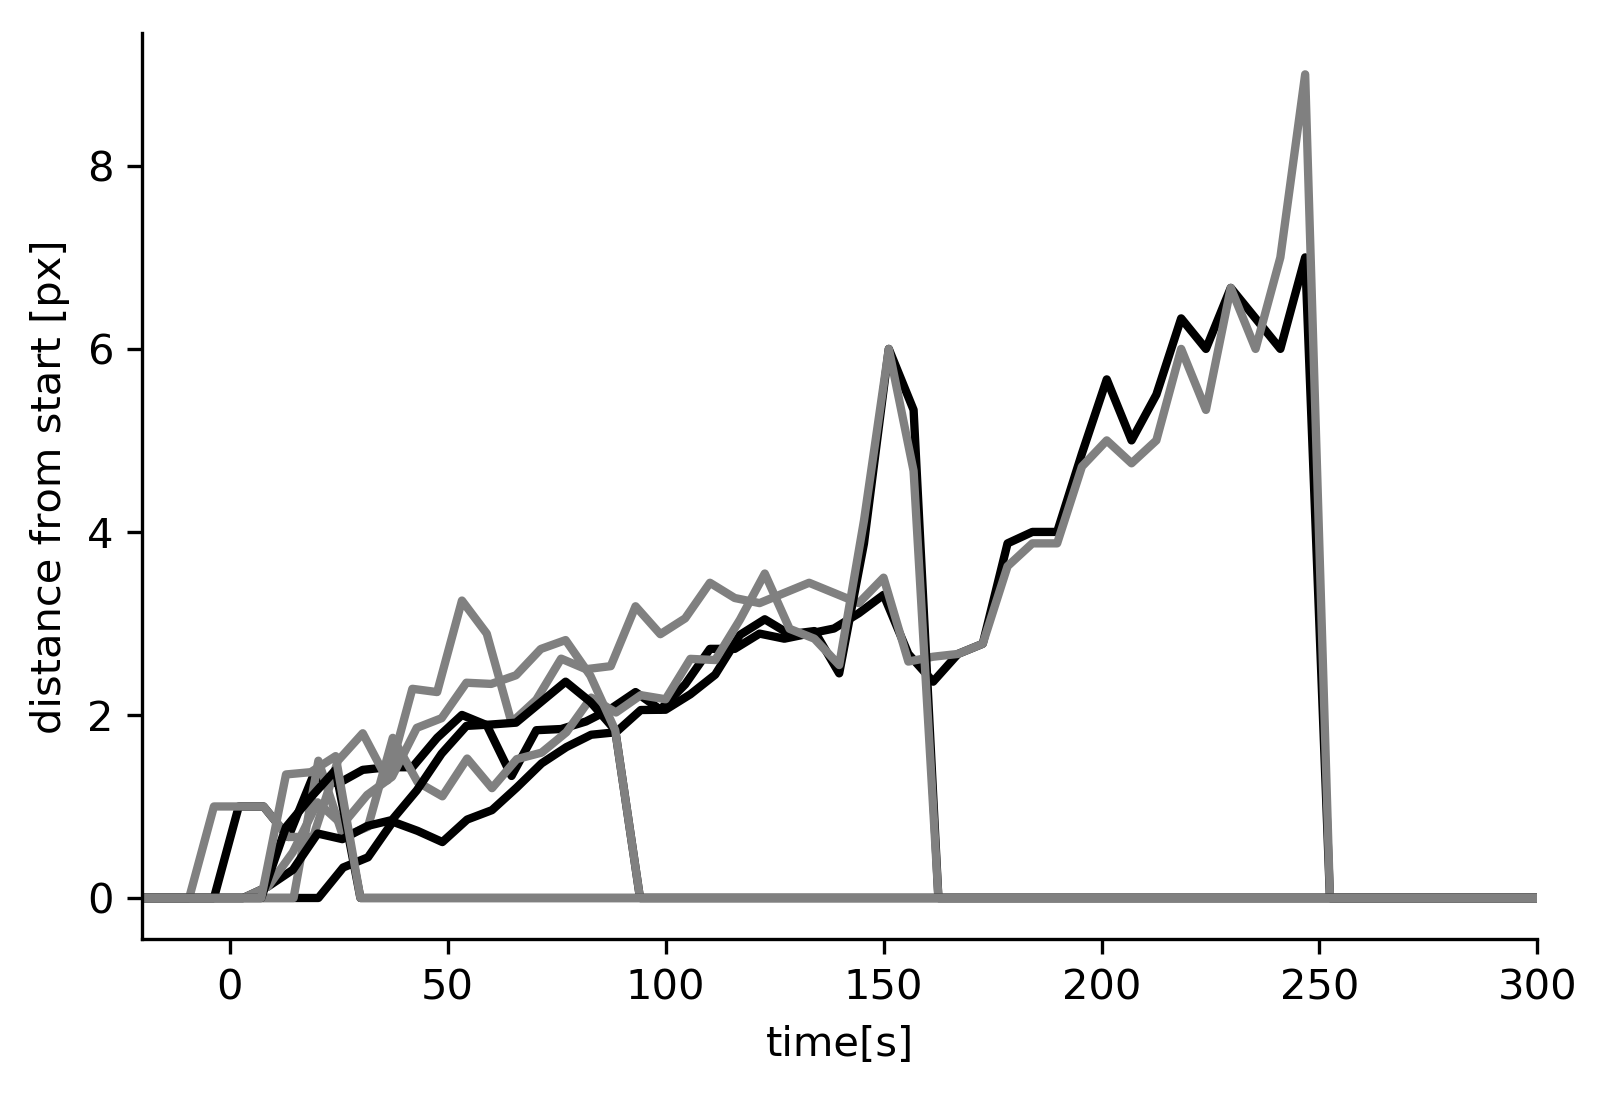

In [250]:

plt.figure(dpi=300)

#m_colors = ['magenta','red','crimson']
#s_colors = ['mediumspringgreen','lawngreen','lime']
m_colors = ['black','black','black','black']
s_colors = ['grey','grey','grey','grey']
#timeShift = [0,40,95] this shift shifts everything to t=-40

bufferSize = 200
bufferZero = 100


timeShift = np.array([0,30,70,120]) +30
alph = 0.05
liwi = 2


cohortIdx = 3
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = avgAllColumns_ignoreValue(m_buffer,-10,0)
s_buffer_average = avgAllColumns_ignoreValue(s_buffer,-10,0)
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
#plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
#plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)

#--------

cohortIdx = 2
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = avgAllColumns_ignoreValue(m_buffer,-10,0)
s_buffer_average = avgAllColumns_ignoreValue(s_buffer,-10,0)
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
#plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
#plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)




#------

cohortIdx = 1
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = avgAllColumns_ignoreValue(m_buffer,-10,0)
s_buffer_average = avgAllColumns_ignoreValue(s_buffer,-10,0)
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
#plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
#plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)



#------

cohortIdx = 0
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = avgAllColumns_ignoreValue(m_buffer,-10,0)
s_buffer_average = avgAllColumns_ignoreValue(s_buffer,-10,0)
m_buffer_std = np.nanstd(m_buffer,axis=0)
s_buffer_std = np.nanstd(s_buffer,axis=0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
#plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
#plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(-20,300)
#plt.ylim(-7000,45000)
plt.xlabel('time[s]')
plt.ylabel('distance from start [px]')

len_ax0 18
len_ax1 200
len_ax0 18
len_ax1 200
len_ax0 18
len_ax1 200
len_ax0 18
len_ax1 200


Text(0,0.5,'distance [px]')

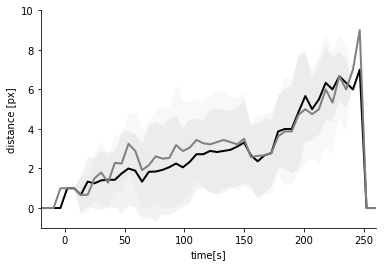

In [256]:
cohortIdx = 3
m_buffer,s_buffer = cohortBuffers[cohortIdx]

m_buffer_average = avgAllColumns_ignoreValue(m_buffer,-10,0)
s_buffer_average = avgAllColumns_ignoreValue(s_buffer,-10,0)
m_buffer_std = stdAllColumns_ignoreValue(m_buffer,-10,0)
s_buffer_std = stdAllColumns_ignoreValue(s_buffer,-10,0)
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)+timeShift[cohortIdx]

plt.plot(time,m_buffer_average,c=m_colors[cohortIdx],lw=liwi)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor=m_colors[cohortIdx],alpha=alph)

plt.plot(time,s_buffer_average,c=s_colors[cohortIdx],lw=liwi)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor=s_colors[cohortIdx],alpha=alph)

plt.xlim(-20,260)
plt.ylim(-1,10)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('time[s]')
plt.ylabel('distance [px]')

(-120, 100)

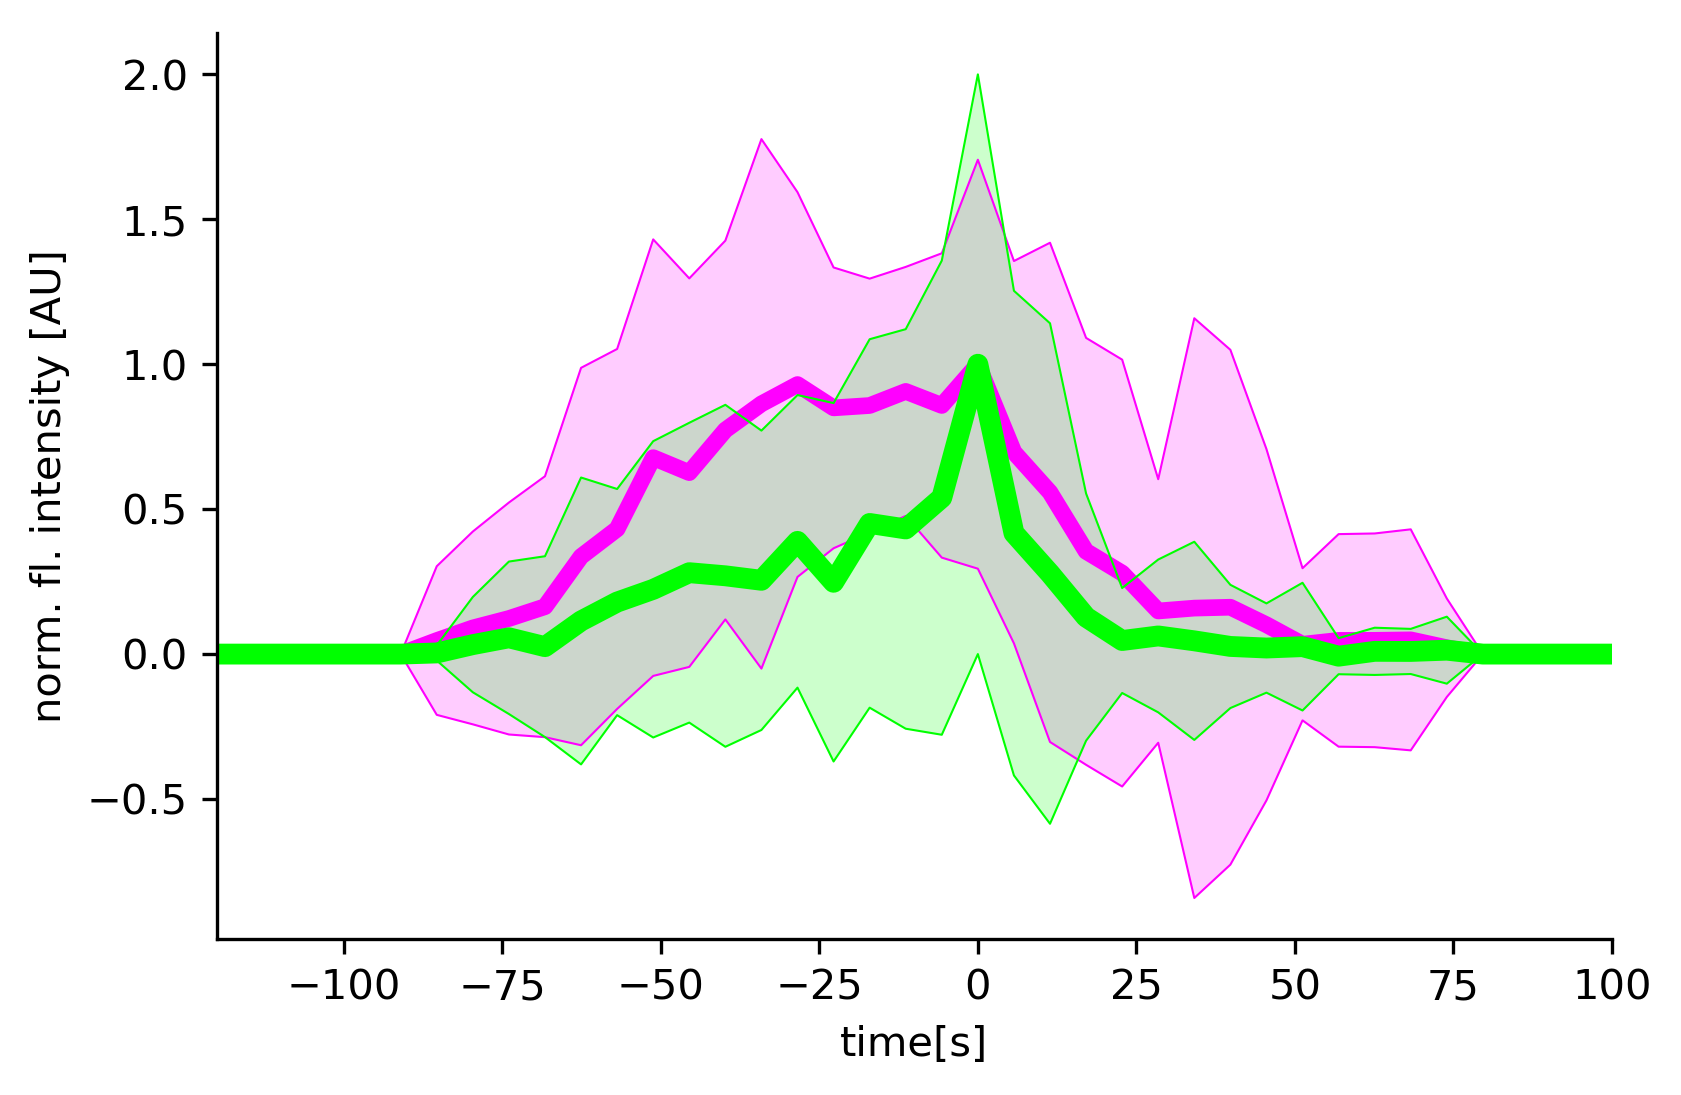

In [29]:
m_buffer_average = (np.nanmean(m_buffer,axis=0)-backgroundIntensity)
m_buffer_average = m_buffer_average/max(m_buffer_average)
s_buffer_average = (np.nanmean(s_buffer,axis=0)-backgroundIntensity)/max(s_buffer_average)
s_buffer_average = s_buffer_average/max(s_buffer_average)

m_buffer_std = np.nanstd(m_buffer,axis=0)
m_buffer_std = m_buffer_std/max(m_buffer_std)
s_buffer_std = np.nanstd(s_buffer,axis=0)
s_buffer_std = s_buffer_std/max(s_buffer_std)

time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)

plt.figure(dpi=300)

plt.plot(time,m_buffer_average,c='magenta',lw=4)
plt.plot(time,m_buffer_average-m_buffer_std,c='magenta',lw=0.5)
plt.plot(time,m_buffer_average+m_buffer_std,c='magenta',lw=0.5)
plt.fill_between(time,m_buffer_average-m_buffer_std,m_buffer_average+m_buffer_std,facecolor='magenta',alpha=0.2)

plt.plot(time,s_buffer_average,c='lime',lw=5)
plt.plot(time,s_buffer_average-s_buffer_std,c='lime',lw=0.5)
plt.plot(time,s_buffer_average+s_buffer_std,c='lime',lw=0.5)
plt.fill_between(time,s_buffer_average-s_buffer_std,s_buffer_average+s_buffer_std,facecolor='lime',alpha=0.2)

plt.xlabel('time[s]')
plt.ylabel('norm. fl. intensity [AU]')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
#plt.ylim(-0.5,2.1)
plt.xlim(-120,100)

(-220, 120)

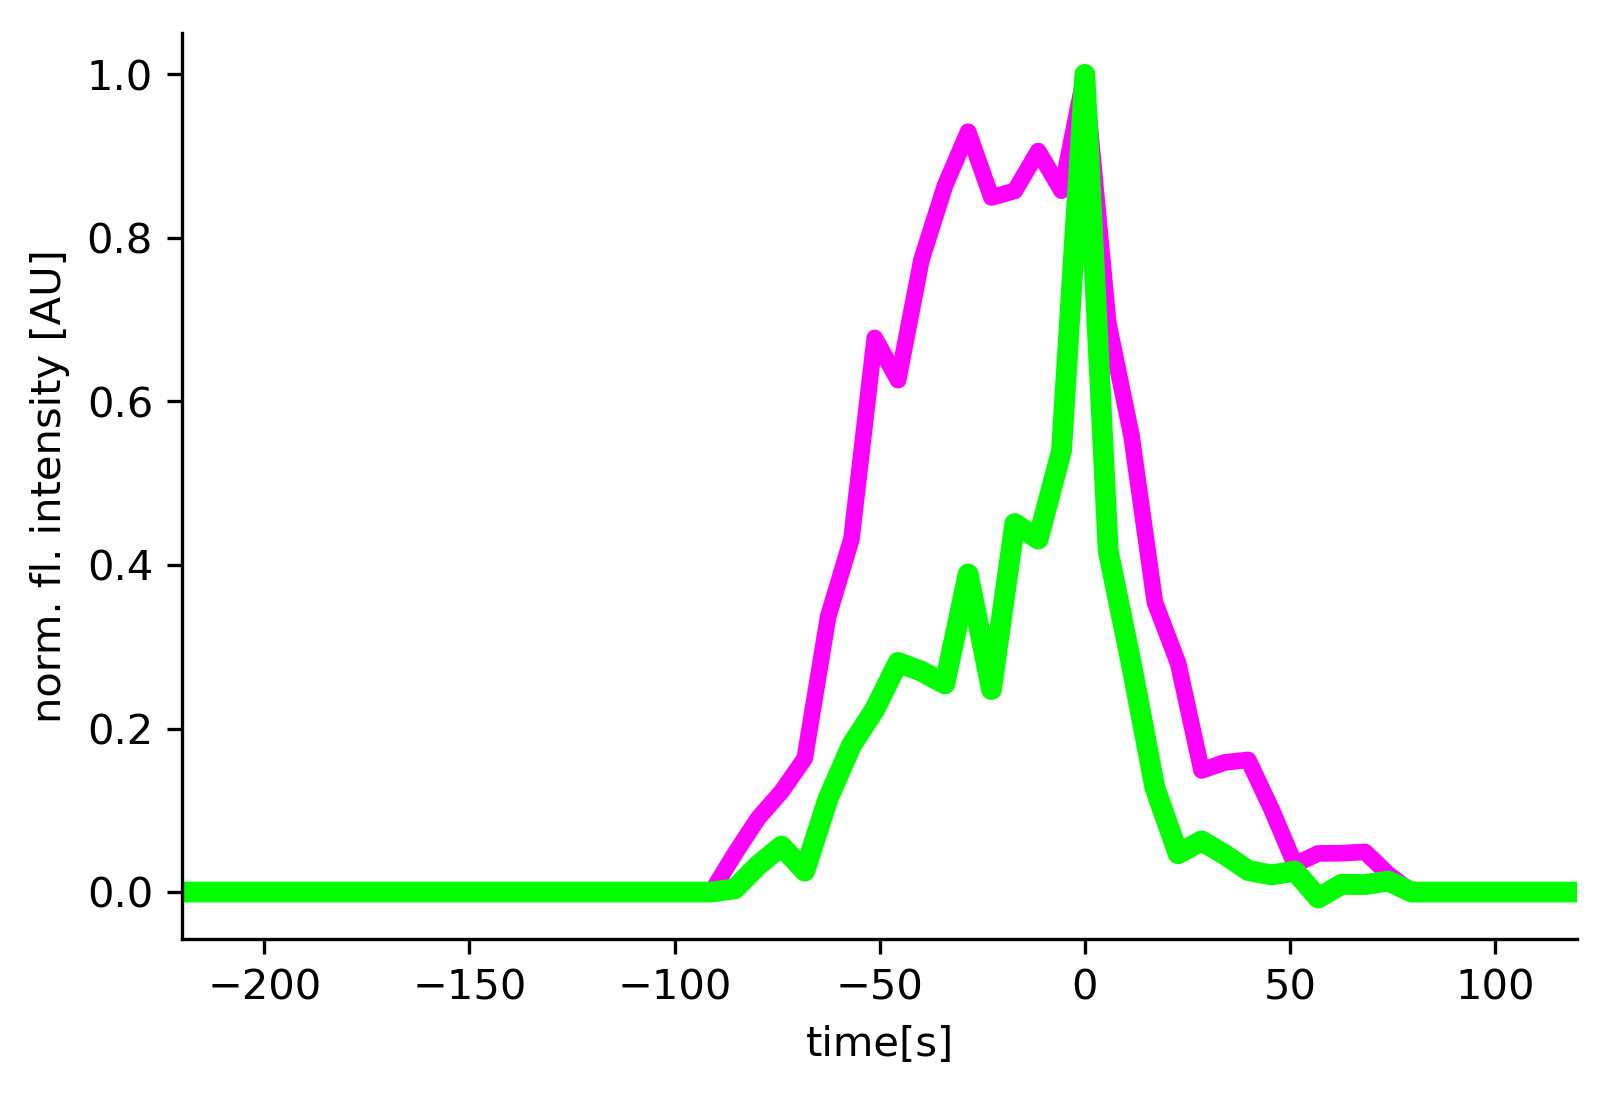

In [30]:

m_buffer_average = np.nanmean(m_buffer,axis=0)-backgroundIntensity
s_buffer_average = np.nanmean(s_buffer,axis=0)-backgroundIntensity
time = framerate_msec/1000*(np.array(range(0,bufferSize))-bufferZero)
plt.figure(dpi=300)
plt.plot(time,m_buffer_average/max(m_buffer_average),c='magenta',lw=4)
plt.plot(time,s_buffer_average/max(s_buffer_average),c='lime',lw=5)
plt.xlabel('time[s]')
plt.ylabel('norm. fl. intensity [AU]')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlim(-220,120)


In [97]:
m_mean = []
s_mean = []
for i in range(0,bufferSize):
    m_mean.append(np.nanmean(m_buffer[i]))
    s_mean.append(np.nanmean(s_buffer[i]))
    
plt.plot(np.arange(0,len(m_mean))*framerate_msec/1000,m_mean, c='red')
plt.plot(np.arange(0,len(m_mean))*framerate_msec/1000,s_mean, c='green')

IndexError: index 16 is out of bounds for axis 0 with size 16

In [ ]:
#Lifetime Cohorts

In [ ]:
for tc in range(1,len(lifetimeCohorts)):

    m_buffer = []
    s_buffer = []
    bufferSize = 1000
    for i in range(0,bufferSize):
        m_buffer.append([])
        s_buffer.append([])
    
        
    for trackId in lifetimeCohorts[tc]:
        #print(trackId)
        track = data[data['trackId'] == trackId]
    
        m_intensity = track['m_A'].values.astype(float)
        s_intensity = track['s_A'].values.astype(float)
        
        #plt.plot(s_intensity)
        
        for i in range(0,len(track)):
            m_buffer[i].append(m_intensity[i])
            s_buffer[i].append(s_intensity[i])
            
    
    m_mean = []
    s_mean = []
    for i in range(0,bufferSize):
        m_mean.append(np.nanmean(m_buffer[i]))
        s_mean.append(np.nanmean(s_buffer[i]))
        
    plt.plot(np.arange(0,len(m_mean))*framerate_msec/1000,m_mean, c='red')
    plt.plot(np.arange(0,len(m_mean))*framerate_msec/1000,s_mean, c='green')

plt.xlabel('lifetime[s]')
plt.show()




In [ ]:
for tc in range(1,len(lifetimeCohorts)):

    m_buffer = []
    s_buffer = []
    bufferSize = 1000
    for i in range(0,bufferSize):
        m_buffer.append([])
        s_buffer.append([])
    
        
    for trackId in lifetimeCohorts[tc]:
        #print(trackId)
        track = data[data['trackId'] == trackId]
    
        m_intensity = track['m_A'].values.astype(float)
        s_intensity = track['s_A'].values.astype(float)
        
        #plt.plot(s_intensity)
        
        for i in range(0,len(track)):
            m_buffer[i].append(m_intensity[i])
            s_buffer[i].append(s_intensity[i])
            
    
    m_mean = []
    s_mean = []
    for i in range(0,bufferSize):
        m_mean.append(np.nanmean(m_buffer[i]))
        s_mean.append(np.nanmean(s_buffer[i]))
        
    plt.plot(np.arange(0,len(m_mean))*framerate_msec/1000,m_mean, c='red')
    plt.plot(np.arange(0,len(m_mean))*framerate_msec/1000,s_mean, c='green')

plt.xlabel('lifetime[s]')
plt.show()



In [ ]:
lifetimeThresholds = [1, 20, 40, 60, 80, 100, 120, 200]

lifetimeCohorts = []

dataBasis = cat_Ia_Tracks
for i in range(2,len(lifetimeThresholds)):
    lifetimeCohort_trackIds = np.unique(dataBasis.loc[(dataBasis["lifetime"] >= lifetimeThresholds[i-1]) & (dataBasis["lifetime"] < lifetimeThresholds[i]), "trackId"])
    print('number of tracks in cohort '+str(lifetimeThresholds[i-1])+'-'+str(lifetimeThresholds[i-1])+': '+str(len(lifetimeCohort_trackIds)))
    lifetimeCohorts.append(lifetimeCohort_trackIds)
#print(lifetimeCohorts)